##**ASSIGNMENT 3** 


##**CIFAR10 USING GENERATIVE ADVERSIAL NETWORK**


##**NAME: ALOUKIK ADITYA (1115290)**

In [5]:
%tensorflow_version 1.14 #--------------------------------Setting version of tension flow in colab

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14 #--------------------------------Setting version of tension flow in colab`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


##**Importing all the libraries below**

In [0]:


import numpy as np 
from tensorflow.python.keras.models import Sequential, Model 
from tensorflow.keras.optimizers import Adam,SGD 
import tensorflow.python.keras 
from tensorflow.python.keras.layers.advanced_activations import LeakyReLU 
from tensorflow.python.keras.layers import ZeroPadding2D ,BatchNormalization, Activation
from tensorflow.python.keras.layers.convolutional import UpSampling2D, Conv2D 
from tensorflow.python.keras.layers import Reshape,Input, Dense, Dropout,   Flatten
import matplotlib.pyplot as plt 
from tqdm import tqdm

In [0]:
image_shape = (32, 32, 3)    #-------------------- Setting the size of image as we have image size of 32 in cifar10       
dimension_l = 100            #-------- taking dimension variable as well

In [0]:



(X_train, y_train), (X_test, y_test) = tensorflow.python.keras.datasets.cifar10.load_data() #----------- loading cifar10 dataset from keras, we dont need testing data in this task
X_train = X_train[y_train.flatten() == 8] #----------------------------------------------flatteirng the image

In [0]:
def Show_image(): #--------------------------------------This function will help in seeing the generated images by the model
		row, coloumn = 4,4#------------------------specifying size
		e_noise = np.random.normal(0, 1, (row * coloumn, dimension_l)) #-----------Adding noise to the images
		Final_image_toshow = generator.predict(e_noise) 


		Final_image_toshow = 0.5 * Final_image_toshow + 0.5

		fig, ckj = plt.subplots(row, coloumn) #----------------used in plotting the image
		k = 0
		for i in range(row): #------------------for loop will iterate many images at once
			for j in range(coloumn): 
				ckj[i,j].imshow(Final_image_toshow[k, :,:,]) 
				ckj[i,j].axis('off') 
				k += 1
		plt.show() 
		plt.close() 

##**COMPLETE MODEL OF GAN**

In [0]:
class Generative_AD_Network():#---------------------------------------creating a class for GAN, it is combined with generator and discriminator
  def GAN_Generator(self): #------------------------------------------creating a method for Generator

    self.model = Sequential()  
    self.model.add(Dense(128 * 8 * 8, activation="relu", input_dim=dimension_l)) #--------------------------------creating model for generator
    self.model.add(Reshape((8, 8, 128))) 
    self.model.add(UpSampling2D()) 
    self.model.add(Conv2D(128, kernel_size=3, padding="same")) 
    self.model.add(BatchNormalization(momentum=0.78)) 
    self.model.add(Activation("relu")) 
    self.model.add(UpSampling2D()) 
    self.model.add(Conv2D(64, kernel_size=3, padding="same")) 
    self.model.add(BatchNormalization(momentum=0.78)) 
    self.model.add(Activation("relu")) 
    self.model.add(Conv2D(3, kernel_size=3, padding="same")) 
    self.model.add(Activation("tanh")) 
    self.e_noise = Input(shape=(dimension_l,)) 
    self.image = self.model(self.e_noise) 
    return Model(self.e_noise, self.image) 

  def GAN_Discriminator(self): #-------------------------------------------creating a method for Discriminator

    self.model = Sequential() 

    self.model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=image_shape, padding="same")) 
    self.model.add(LeakyReLU(alpha=0.2)) #----------------------------------------------------------------model for discriminator
    self.model.add(Dropout(0.25)) 
    self.model.add(Conv2D(64, kernel_size=3, strides=2, padding="same")) 
    self.model.add(ZeroPadding2D(padding=((0,1),(0,1)))) 
    self.model.add(BatchNormalization(momentum=0.82)) 
    self.model.add(LeakyReLU(alpha=0.25)) 
    self.model.add(Dropout(0.25)) 
    self.model.add(Conv2D(128, kernel_size=3, strides=2, padding="same")) 
    self.model.add(BatchNormalization(momentum=0.82)) 
    self.model.add(LeakyReLU(alpha=0.2)) 
    self.model.add(Dropout(0.25)) 
    self.model.add(Conv2D(256, kernel_size=3, strides=1, padding="same")) 
    self.model.add(BatchNormalization(momentum=0.8)) 
    self.model.add(LeakyReLU(alpha=0.25)) 
    self.model.add(Dropout(0.25)) 
    self.model.add(Flatten()) 
    self.model.add(Dense(1, activation='sigmoid')) 
    self.image = Input(shape=image_shape) 
    self.validity = self.model(self.image) 

    return Model(self.image, self.validity)


In [12]:
a = Generative_AD_Network()#--------------------------------calling object from the class Generative_AD_Network

Discr = a.GAN_Discriminator() #--------------------------------------------assigning dicriminator
Discr.compile(loss='binary_crossentropy', #-----------------------------compiling discimnator
					optimizer=Adam(0.0002,0.5), 
					metrics=['accuracy']) 

Discr.trainable = False

generator = a.GAN_Generator() #--------------------------------------------assigning generator
z = Input(shape=(dimension_l,)) 
image = generator(z)  
valid = Discr(image) 
Network_Combined = Model(z, valid) #-----------------------------compiling both generator and discriminator
Network_Combined.compile(loss='binary_crossentropy', 
						optimizer=Adam(0.0002,0.5)) 


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


  0%|          | 0/100000 [00:00<?, ?it/s]

The Epoch number is 0


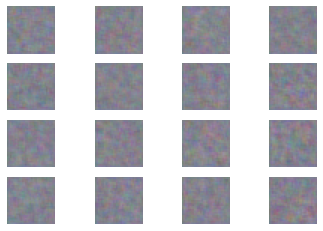

  2%|▎         | 2500/100000 [01:37<57:03, 28.48it/s]

The Epoch number is 2500


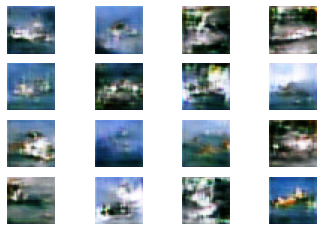

  5%|▌         | 5000/100000 [03:05<54:24, 29.10it/s]

The Epoch number is 5000


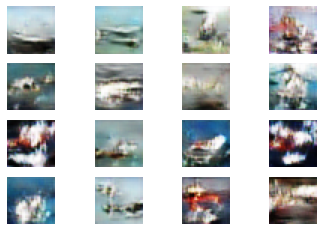

  7%|▋         | 7498/100000 [04:31<52:39, 29.28it/s]

The Epoch number is 7500


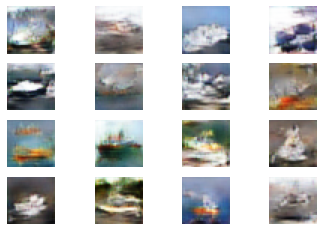

 10%|█         | 10000/100000 [05:58<51:52, 28.92it/s]

The Epoch number is 10000


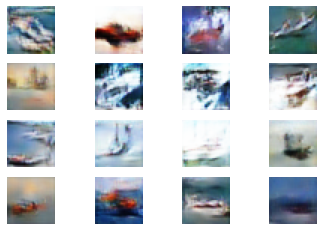

 12%|█▏        | 12499/100000 [07:25<51:04, 28.55it/s]

The Epoch number is 12500


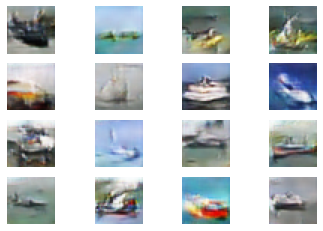

 15%|█▍        | 14998/100000 [08:53<51:12, 27.67it/s]

The Epoch number is 15000


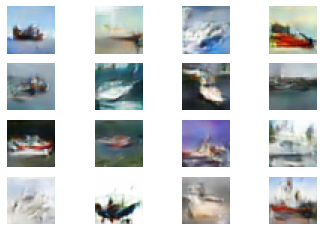

 17%|█▋        | 17499/100000 [10:20<47:05, 29.20it/s]

The Epoch number is 17500


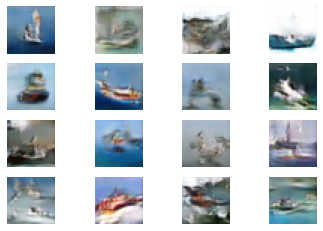

 20%|█▉        | 19998/100000 [11:47<47:17, 28.19it/s]

The Epoch number is 20000


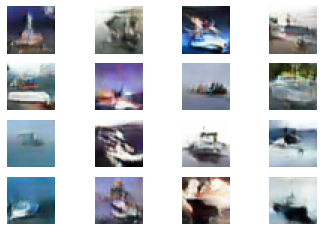

 22%|██▏       | 22499/100000 [13:14<45:48, 28.20it/s]

The Epoch number is 22500


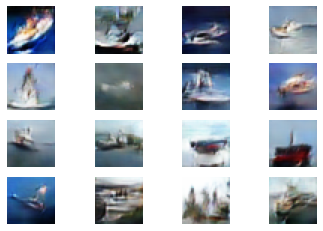

 25%|██▍       | 24999/100000 [14:41<44:11, 28.28it/s]

The Epoch number is 25000


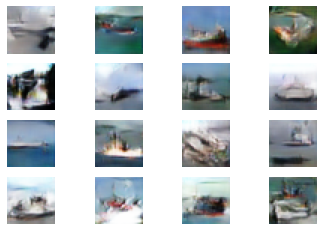

 27%|██▋       | 27498/100000 [16:08<42:05, 28.71it/s]

The Epoch number is 27500


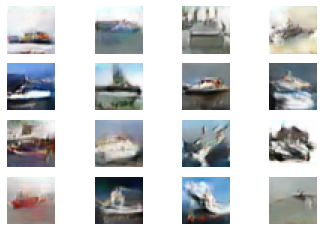

 30%|███       | 30000/100000 [17:35<39:06, 29.83it/s]

The Epoch number is 30000


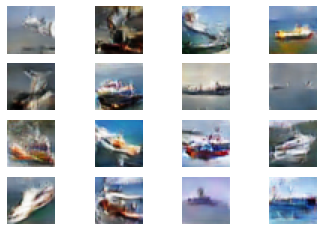

 32%|███▏      | 32498/100000 [19:02<39:52, 28.21it/s]

The Epoch number is 32500


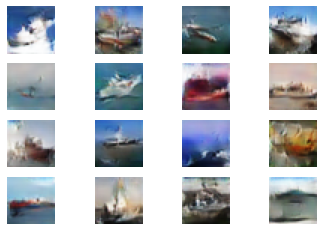

 35%|███▍      | 34998/100000 [20:30<37:37, 28.80it/s]

The Epoch number is 35000


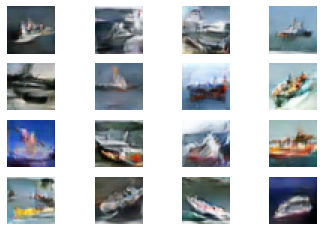

 37%|███▋      | 37498/100000 [21:57<36:47, 28.31it/s]

The Epoch number is 37500


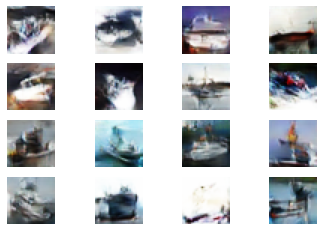

 40%|███▉      | 39999/100000 [23:25<35:51, 27.88it/s]

The Epoch number is 40000


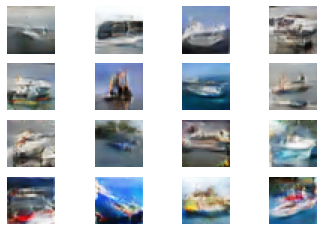

 42%|████▏     | 42499/100000 [24:54<33:48, 28.34it/s]

The Epoch number is 42500


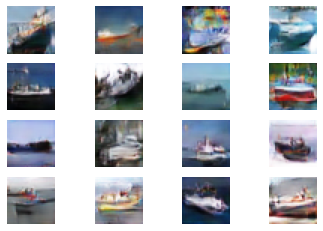

 45%|████▍     | 44999/100000 [26:24<33:07, 27.67it/s]

The Epoch number is 45000


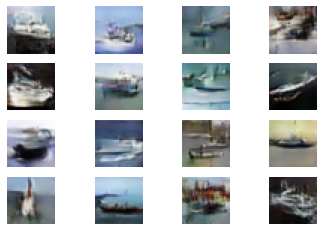

 48%|████▊     | 47500/100000 [27:52<30:10, 28.99it/s]

The Epoch number is 47500


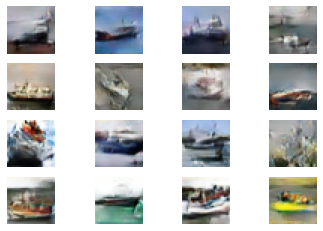

 50%|████▉     | 49999/100000 [29:21<29:56, 27.83it/s]

The Epoch number is 50000


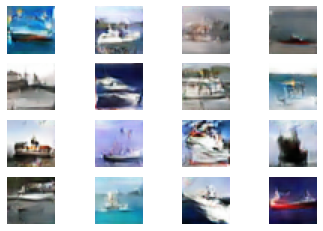

 52%|█████▎    | 52500/100000 [30:51<28:24, 27.87it/s]

The Epoch number is 52500


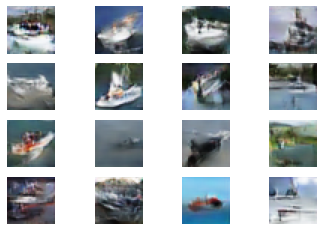

 55%|█████▍    | 54999/100000 [32:21<27:21, 27.42it/s]

The Epoch number is 55000


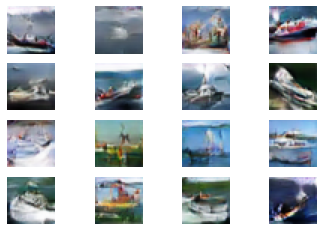

 57%|█████▋    | 57499/100000 [33:52<25:08, 28.17it/s]

The Epoch number is 57500


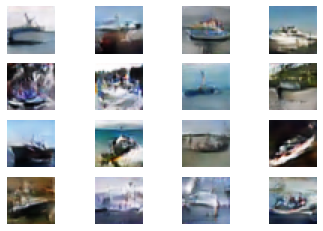

 60%|█████▉    | 59998/100000 [35:24<24:10, 27.58it/s]

The Epoch number is 60000


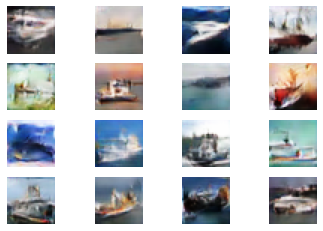

 62%|██████▎   | 62500/100000 [36:55<22:47, 27.42it/s]

The Epoch number is 62500


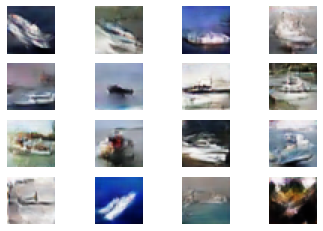

 65%|██████▌   | 65000/100000 [38:26<21:13, 27.48it/s]

The Epoch number is 65000


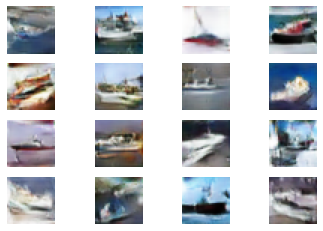

 67%|██████▋   | 67499/100000 [39:57<19:58, 27.11it/s]

The Epoch number is 67500


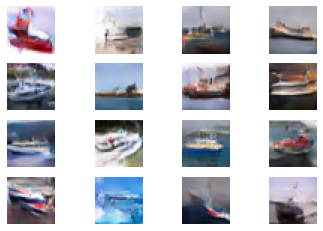

 70%|██████▉   | 69998/100000 [41:29<17:37, 28.37it/s]

The Epoch number is 70000


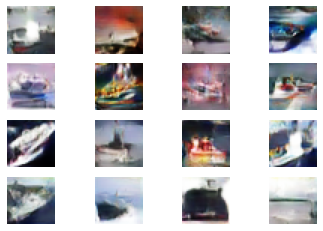

 72%|███████▏  | 72499/100000 [43:00<16:30, 27.78it/s]

The Epoch number is 72500


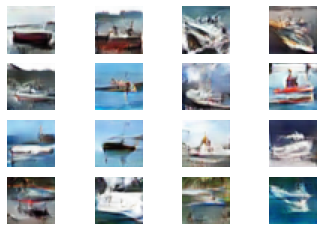

 75%|███████▍  | 74998/100000 [44:30<15:19, 27.19it/s]

The Epoch number is 75000


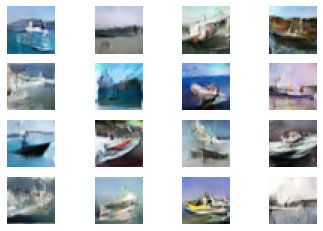

 78%|███████▊  | 77500/100000 [46:00<13:51, 27.07it/s]

The Epoch number is 77500


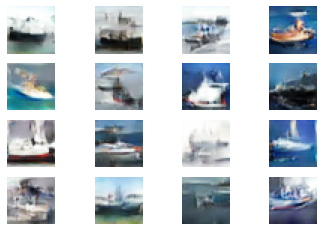

 80%|███████▉  | 79998/100000 [47:31<11:53, 28.05it/s]

The Epoch number is 80000


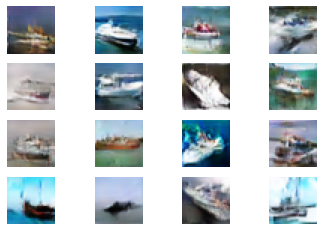

 82%|████████▏ | 82498/100000 [49:02<10:20, 28.19it/s]

The Epoch number is 82500


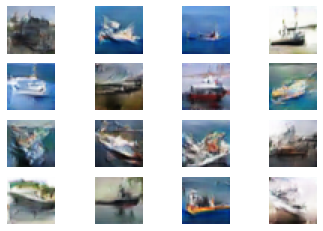

 85%|████████▍ | 84999/100000 [50:32<08:40, 28.82it/s]

The Epoch number is 85000


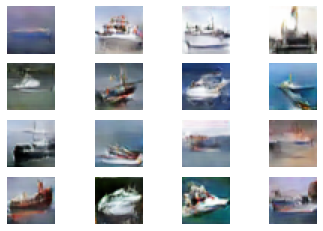

 87%|████████▋ | 87498/100000 [52:02<07:17, 28.59it/s]

The Epoch number is 87500


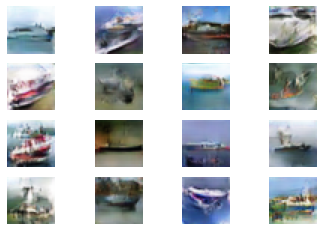

 90%|█████████ | 90000/100000 [53:33<06:07, 27.20it/s]

The Epoch number is 90000


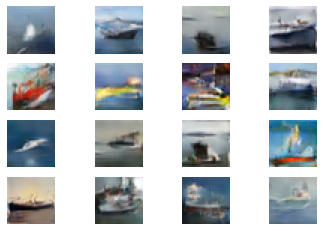

 92%|█████████▎| 92500/100000 [55:04<04:25, 28.26it/s]

The Epoch number is 92500


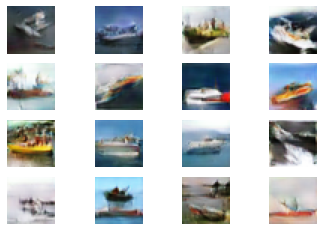

 95%|█████████▍| 94999/100000 [56:36<03:09, 26.36it/s]

The Epoch number is 95000


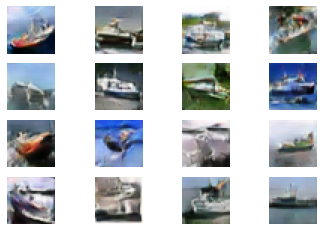

 97%|█████████▋| 97498/100000 [58:08<01:28, 28.37it/s]

The Epoch number is 97500


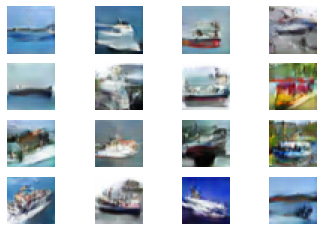

100%|██████████| 100000/100000 [59:38<00:00, 27.95it/s]


In [13]:
Size_batch=32 #------------------------------setting size of batches
Total_epochs=100000#---------------------------selecting number of total epochs to be run


X_train = (X_train / 127.5) - 1. #--------------------------preprocessing images
		
alk = np.ones((Size_batch, 1)) #---------------creatng matrix of np ones

alk = alk + 0.05 * np.random.random(alk.shape) 
unreal = np.zeros((Size_batch, 1))  #--------------creating matrix of np zeros
unreal = unreal +( 0.05 * np.random.random(unreal.shape) )

for i in tqdm(range(Total_epochs)): #----------------------------------------Final loop
			
		 
			Ind = np.random.randint(0, X_train.shape[0], Size_batch) #-----------------setting index values
			images = X_train[Ind] 

			
			e_noise = np.random.normal(0, 1, (Size_batch, dimension_l)) #--------------------random noise selection of image
			Final_image_toshow = generator.predict(e_noise) 
			
			G_loss = Network_Combined.train_on_batch(e_noise, alk) 
			 
			Loss_D_Real = Discr.train_on_batch(images, alk) #---------------------------------loss of real
			Loss_D_Fake = Discr.train_on_batch(Final_image_toshow, unreal) #---------------------LOSs of fake
			Loss_D = 0.5 * np.add(Loss_D_Real, Loss_D_Fake) 
			
		 
		
			
							 
			if i % 2500 == 0: #-----------------------------------------every 2500, image will show up, as the epochs increases the iamge will get better
				print("The Epoch number is",+ i)
				Show_image() 


In [0]:
X_train.shape[0]

##**LAST EPOCH FINAL GENERATED IMAGES**

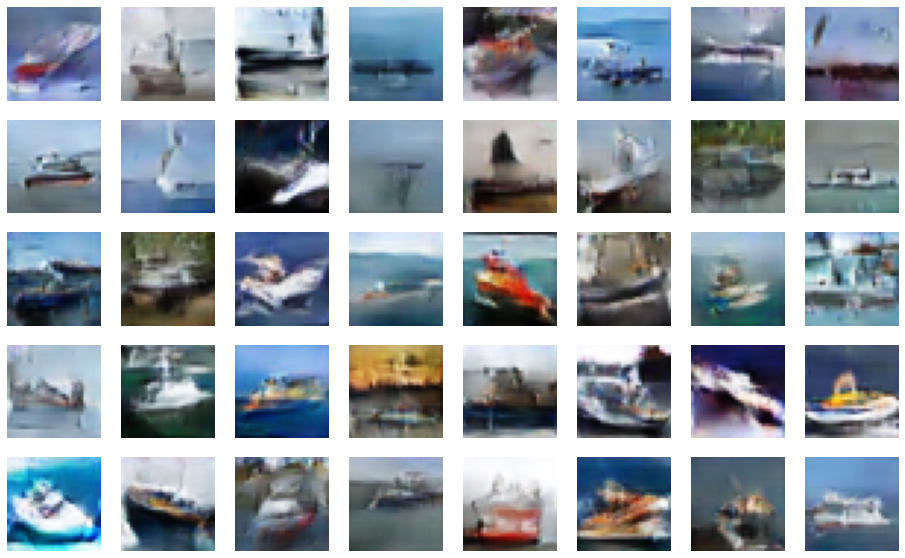

In [57]:

e_noise = np.random.normal(size=(40, dimension_l)) #----------------THE final block to see the images 
Image_output = generator.predict(e_noise) 
Image_output = 0.5 * Image_output + 0.5
f, ax = plt.subplots(5,8, figsize=(16,10)) 
for i, image in enumerate(Image_output): 
	ax[i//8, i%8].imshow(image) 
	ax[i//8, i%8].axis('off') 
		
plt.show() 


##**ORIGNAL IMAGES**

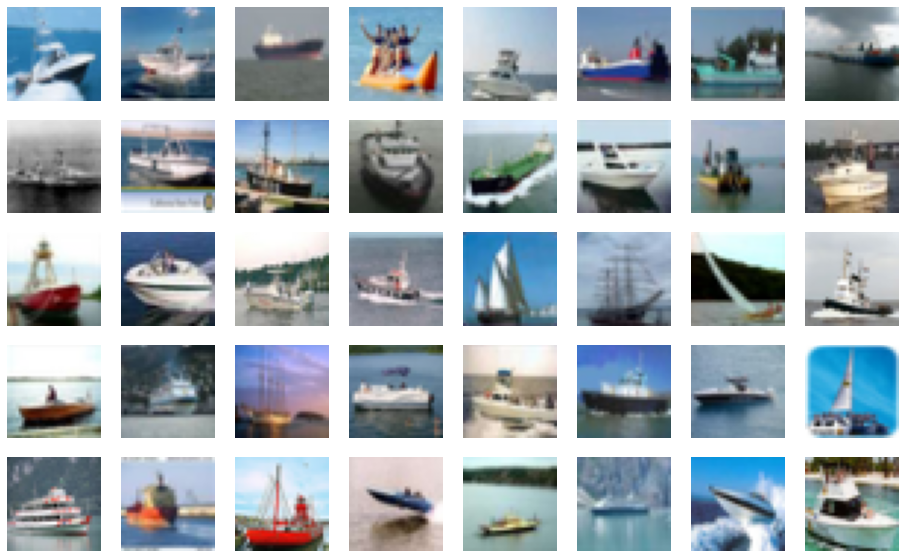

In [60]:
#------------------------------------ original images  
orignal_image=X_train[:40] 
orignal_image = 0.5 * orignal_image + 0.5
f, ax = plt.subplots(5,8, figsize=(16,10)) 
for i, image in enumerate(s): 
    ax[i//8, i%8].imshow(image) 
    ax[i//8, i%8].axis('off') 
          
plt.show() 